<a href="https://colab.research.google.com/github/pablex72/CNN-deep-learning/blob/main/classificacion_with_Random_Forest_for_water_body_ok2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
pip install rasterio matplotlib


In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
%cd /content/drive/My Drive/data-water/

/content/drive/My Drive/data-water


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [67]:
yy = rio.open(r"y_train.tif")
yy.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 3.0,
 'width': 3246,
 'height': 2147,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(8.983152841195077e-05, 0.0, 83.87794386645002,
        0.0, -8.983152841195158e-05, 28.293517851685273)}

In [68]:
xx = rio.open(r"X_train.tif")
xx.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 3246,
 'height': 2147,
 'count': 4,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(8.983152841195215e-05, 0.0, 83.87794386645002,
        0.0, -8.983152841195215e-05, 28.293517851685273)}

In [69]:
ds = rio.open(r'X_train.tif')
arr = ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(np.isnan(arr), 0, arr)

nrow_train = arr.shape[0]
ncol_train = arr.shape[1]

X_train = np.reshape(arr, (arr.shape[0] * arr.shape[1], arr.shape[2]))
X_train.shape


(6969162, 4)

In [70]:
ds = rio.open(r'y_train.tif')
arr=ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(arr == np.nan, 0, arr)
y_train = arr.reshape(-1)
y_train.shape

(6969162,)

In [71]:
ds = rio.open(r'X_test.tif')
arr = ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(np.isnan(arr), 0, arr)

nrow_test = arr[0]
ncol_test = arr[1]

X_test = np.reshape(arr, (arr.shape[0] * arr.shape[1], arr.shape[2]))
X_test.shape


(4207593, 4)

In [72]:
ds = rio.open(r'y_test.tif')
arr = ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(np.isnan(arr), 0, arr)
y_test = np.reshape(arr, (arr.shape[0] * arr.shape[1], arr.shape[2]))
nrow_test = arr.shape[0]
ncol_test = arr.shape[1]
y_test.shape

(4207593, 1)

In [74]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42, verbose=3, n_jobs=-1)

In [75]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.4min finished


RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42, verbose=3)

In [76]:
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    6.0s finished


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94   3682263
           1       0.71      0.06      0.12    525330

    accuracy                           0.88   4207593
   macro avg       0.80      0.53      0.53   4207593
weighted avg       0.86      0.88      0.83   4207593



In [78]:
y_pred_reshaped = y_pred.reshape(nrow_test, ncol_test)
y_test_reshaped = y_test.reshape(nrow_test, ncol_test)
X_test_reshaped = X_test.reshape(nrow_test, ncol_test, 4)
print(y_pred_reshaped.shape, X_test_reshaped.shape)

(1677, 2509) (1677, 2509, 4)


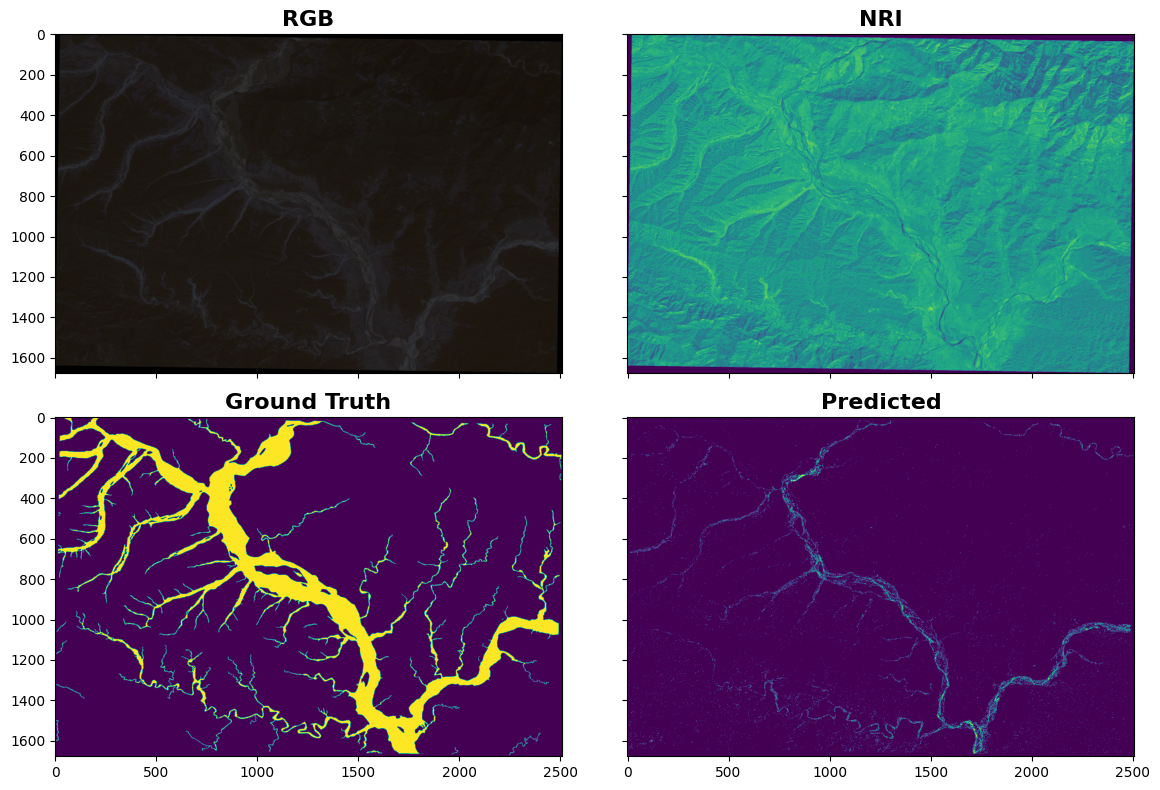

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12,8))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.set_title("RGB", fontweight='bold', fontsize='16')
ax1.imshow(X_test_reshaped[:,:,:3])

ax2.set_title("NRI", fontweight='bold', fontsize='16')
ax2.imshow(X_test_reshaped[:,:,3])

ax3.set_title("Ground Truth", fontweight='bold', fontsize='16')
ax3.imshow(y_test_reshaped[:,:])

ax4.set_title("Predicted", fontweight='bold', fontsize='16')
ax4.imshow(y_pred_reshaped[:,:])

plt.tight_layout()

plt.show()

